# import libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [93]:
res_data = pd.read_csv('Real estate.csv')
x = res_data.iloc[:, :-1].values
y = res_data.iloc[:, -1].values

In [94]:
res_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [95]:
res_data.shape

(414, 8)

# Data Preprocessing

# Let's see if there are any missing values spotted. If not, skip this step.

In [96]:
res_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [97]:
print(x)

[[1.00e+00 2.01e+03 3.20e+01 ... 1.00e+01 2.50e+01 1.22e+02]
 [2.00e+00 2.01e+03 1.95e+01 ... 9.00e+00 2.50e+01 1.22e+02]
 [3.00e+00 2.01e+03 1.33e+01 ... 5.00e+00 2.50e+01 1.22e+02]
 ...
 [4.12e+02 2.01e+03 1.88e+01 ... 7.00e+00 2.50e+01 1.22e+02]
 [4.13e+02 2.01e+03 8.10e+00 ... 5.00e+00 2.50e+01 1.22e+02]
 [4.14e+02 2.01e+03 6.50e+00 ... 9.00e+00 2.50e+01 1.22e+02]]


In [98]:
print(y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

# Create polynomial regression model

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly_processor = PolynomialFeatures(degree=2, include_bias=False)
poly_x_features = poly_processor.fit_transform(x)

In [100]:
poly_x_features.shape

(414, 35)

In [101]:
x.shape

(414, 7)

# Split the Dataset to Train & Test

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(poly_x_features, y, test_size = 0.1, random_state = 1)

In [116]:
print(x_train)

[[2.75e+02 2.01e+03 2.75e+01 ... 2.44e+17 1.19e+18 5.79e+18]
 [2.72e+02 2.01e+03 1.77e+01 ... 2.44e+17 1.19e+18 5.79e+18]
 [9.90e+01 2.01e+03 1.64e+01 ... 2.45e+17 1.19e+18 5.79e+18]
 ...
 [3.97e+02 2.01e+03 3.71e+01 ... 2.44e+17 1.19e+18 5.79e+18]
 [2.36e+02 2.01e+03 1.29e+01 ... 2.44e+17 1.19e+18 5.79e+18]
 [3.80e+01 2.01e+03 1.20e+01 ... 2.44e+17 1.19e+18 5.79e+18]]


In [117]:
print(x_test)

[[3.89e+02 2.01e+03 1.04e+01 ... 2.44e+17 1.19e+18 5.78e+18]
 [1.03e+02 2.01e+03 1.10e+00 ... 2.44e+17 1.19e+18 5.79e+18]
 [1.88e+02 2.01e+03 8.90e+00 ... 2.44e+17 1.19e+18 5.80e+18]
 ...
 [2.39e+02 2.01e+03 1.28e+01 ... 2.44e+17 1.19e+18 5.78e+18]
 [2.74e+02 2.01e+03 1.32e+01 ... 2.44e+17 1.19e+18 5.78e+18]
 [3.65e+02 2.01e+03 3.53e+01 ... 2.44e+17 1.19e+18 5.79e+18]]


# Feature Scaling

# Train Model

In [103]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(x_train, y_train)

LinearRegression()

# 5. Testing the Model using Test set

In [104]:
y_pred = poly_model.predict(x_test)

In [105]:
print(y_pred)

[27.52 53.29 26.49 17.24 54.22 29.57 21.19 42.04 39.42 17.26 15.99 37.28
 27.13 48.12 52.38 28.79 54.35 45.51 18.22 42.6  47.53 15.52 39.75 47.72
 48.34 19.87 23.78 51.31 53.91 22.18 27.7  37.71 42.29 44.3  45.37 19.45
 38.31 41.62 48.16 17.61 37.04 13.86]


In [106]:
y_pred.shape

(42,)

In [107]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[27.52 27.3 ]
 [53.29 54.4 ]
 [26.49 22.  ]
 [17.24 11.6 ]
 [54.22 45.4 ]
 [29.57 23.  ]
 [21.19 21.8 ]
 [42.04 32.2 ]
 [39.42 37.4 ]
 [17.26 22.6 ]
 [15.99 17.4 ]
 [37.28 36.8 ]
 [27.13 23.1 ]
 [48.12 36.9 ]
 [52.38 56.3 ]
 [28.79 20.9 ]
 [54.35 43.5 ]
 [45.51 40.3 ]
 [18.22 27.7 ]
 [42.6  42.1 ]
 [47.53 46.6 ]
 [15.52 21.8 ]
 [39.75 38.1 ]
 [47.72 53.7 ]
 [48.34 57.1 ]
 [19.87 26.6 ]
 [23.78 32.1 ]
 [51.31 56.8 ]
 [53.91 43.1 ]
 [22.18 16.7 ]
 [27.7  33.4 ]
 [37.71 34.2 ]
 [42.29 39.6 ]
 [44.3  52.5 ]
 [45.37 47.1 ]
 [19.45 13.  ]
 [38.31 37.5 ]
 [41.62 32.5 ]
 [48.16 42.3 ]
 [17.61 20.5 ]
 [37.04 40.3 ]
 [13.86 16.1 ]]


In [108]:
pd.DataFrame({'Test': y_test, 'Predicted':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Test,Predicted,Residuals
0,27.3,27.523052,-0.223052
1,54.4,53.285003,1.114997
2,22.0,26.493777,-4.493777
3,11.6,17.240212,-5.640212
4,45.4,54.218082,-8.818082


## Predicting a new result with Polynomial Regression

In [109]:
poly_model.predict(poly_processor.fit_transform([[1,2012.917,32,84.87882,10,24.98298,121.54024]]))

array([45.87])

# Optimize the model and better results

# Evaluate model to observe any prediction error by using RMSE and MSE 

In [110]:
from sklearn import metrics
Poly_MSE = metrics.mean_squared_error(y_test, y_pred)
Poly_RMSE = np.sqrt(Poly_MSE)

In [111]:
pd.DataFrame([Poly_MSE, Poly_RMSE], index=['MSE', 'RMSE'], columns=['metrics'])

,metrics
MSE,36.054173
RMSE,6.004513


# Adjusting the Model

In [112]:
#train list of RMSE per degree
train_RMSE_list = []
#test list of RMSE per degree
test_RMSE_list = []

for d in range(1, 10):

    #Preprocessing
    #reconvert original features into polynomial features
    poly_processor = PolynomialFeatures(degree=d, include_bias=False)
    poly_x_features = poly_processor.fit_transform(x)

    #resplit the dataset
    x_train, x_test, y_train, y_test = train_test_split(poly_x_features, y, test_size = 0.3, random_state = 1)

    #re-train model
    poly_model = LinearRegression()
    poly_model.fit(x_train, y_train)

    #predicting on both Train & Test Data
    y_train_pred = poly_model.predict(x_train)
    y_test_pred = poly_model.predict(x_test)

    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

    #RMSE of Test set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

    #Append the RMSE to the Train and Test list
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)





In [113]:
pd.DataFrame({'Train RMSE list' : train_RMSE_list})

,Train RMSE list
0,8.077384
1,6.276173
2,5.182354
3,12.227589
4,3.710674
5,1.356597
6,4.667054
7,4.196694
8,3.124673


In [114]:
pd.DataFrame({'Test RMSE list' : test_RMSE_list})

,Test RMSE list
0,10.272693
1,9.610676
2,10.609924
3,39.869517
4,427.042241
5,2037.198834
6,28660.332562
7,48410.270875
8,281461.014069


# Plot Polynomial degree vs RMSE
# which degree is best

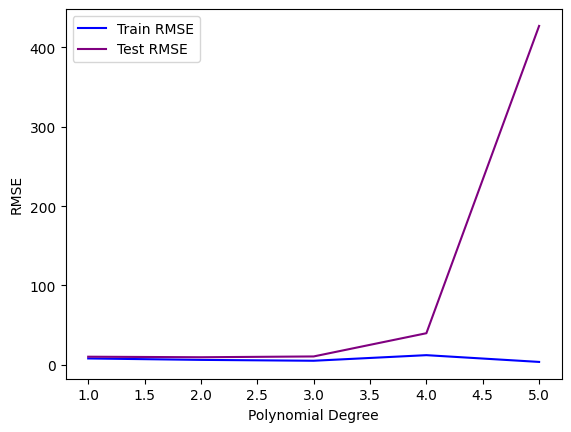

In [115]:
fig = plt.Figure(figsize=(8, 5))
plt.plot(range(1, 6), train_RMSE_list[:5], label='Train RMSE', color="blue")
plt.plot(range(1, 6), test_RMSE_list[:5], label='Test RMSE', color="purple")
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# It seems degree= 2 seems the best choice for model

# because 2.0 looks to have less RMSE for Train and Test.

# blue is where model is plotted, stagnant 

# the lower the RMSE, the better the model and its predictions. 
